## Mengimport Library

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math 

## Membaca Dataset 

In [2]:
data_diabet = pd.read_csv('diabetes.csv')
data_diabet.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


## Ekplorasi Dataset

In [3]:
data_diabet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [4]:
data_diabet.isnull().sum()

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64

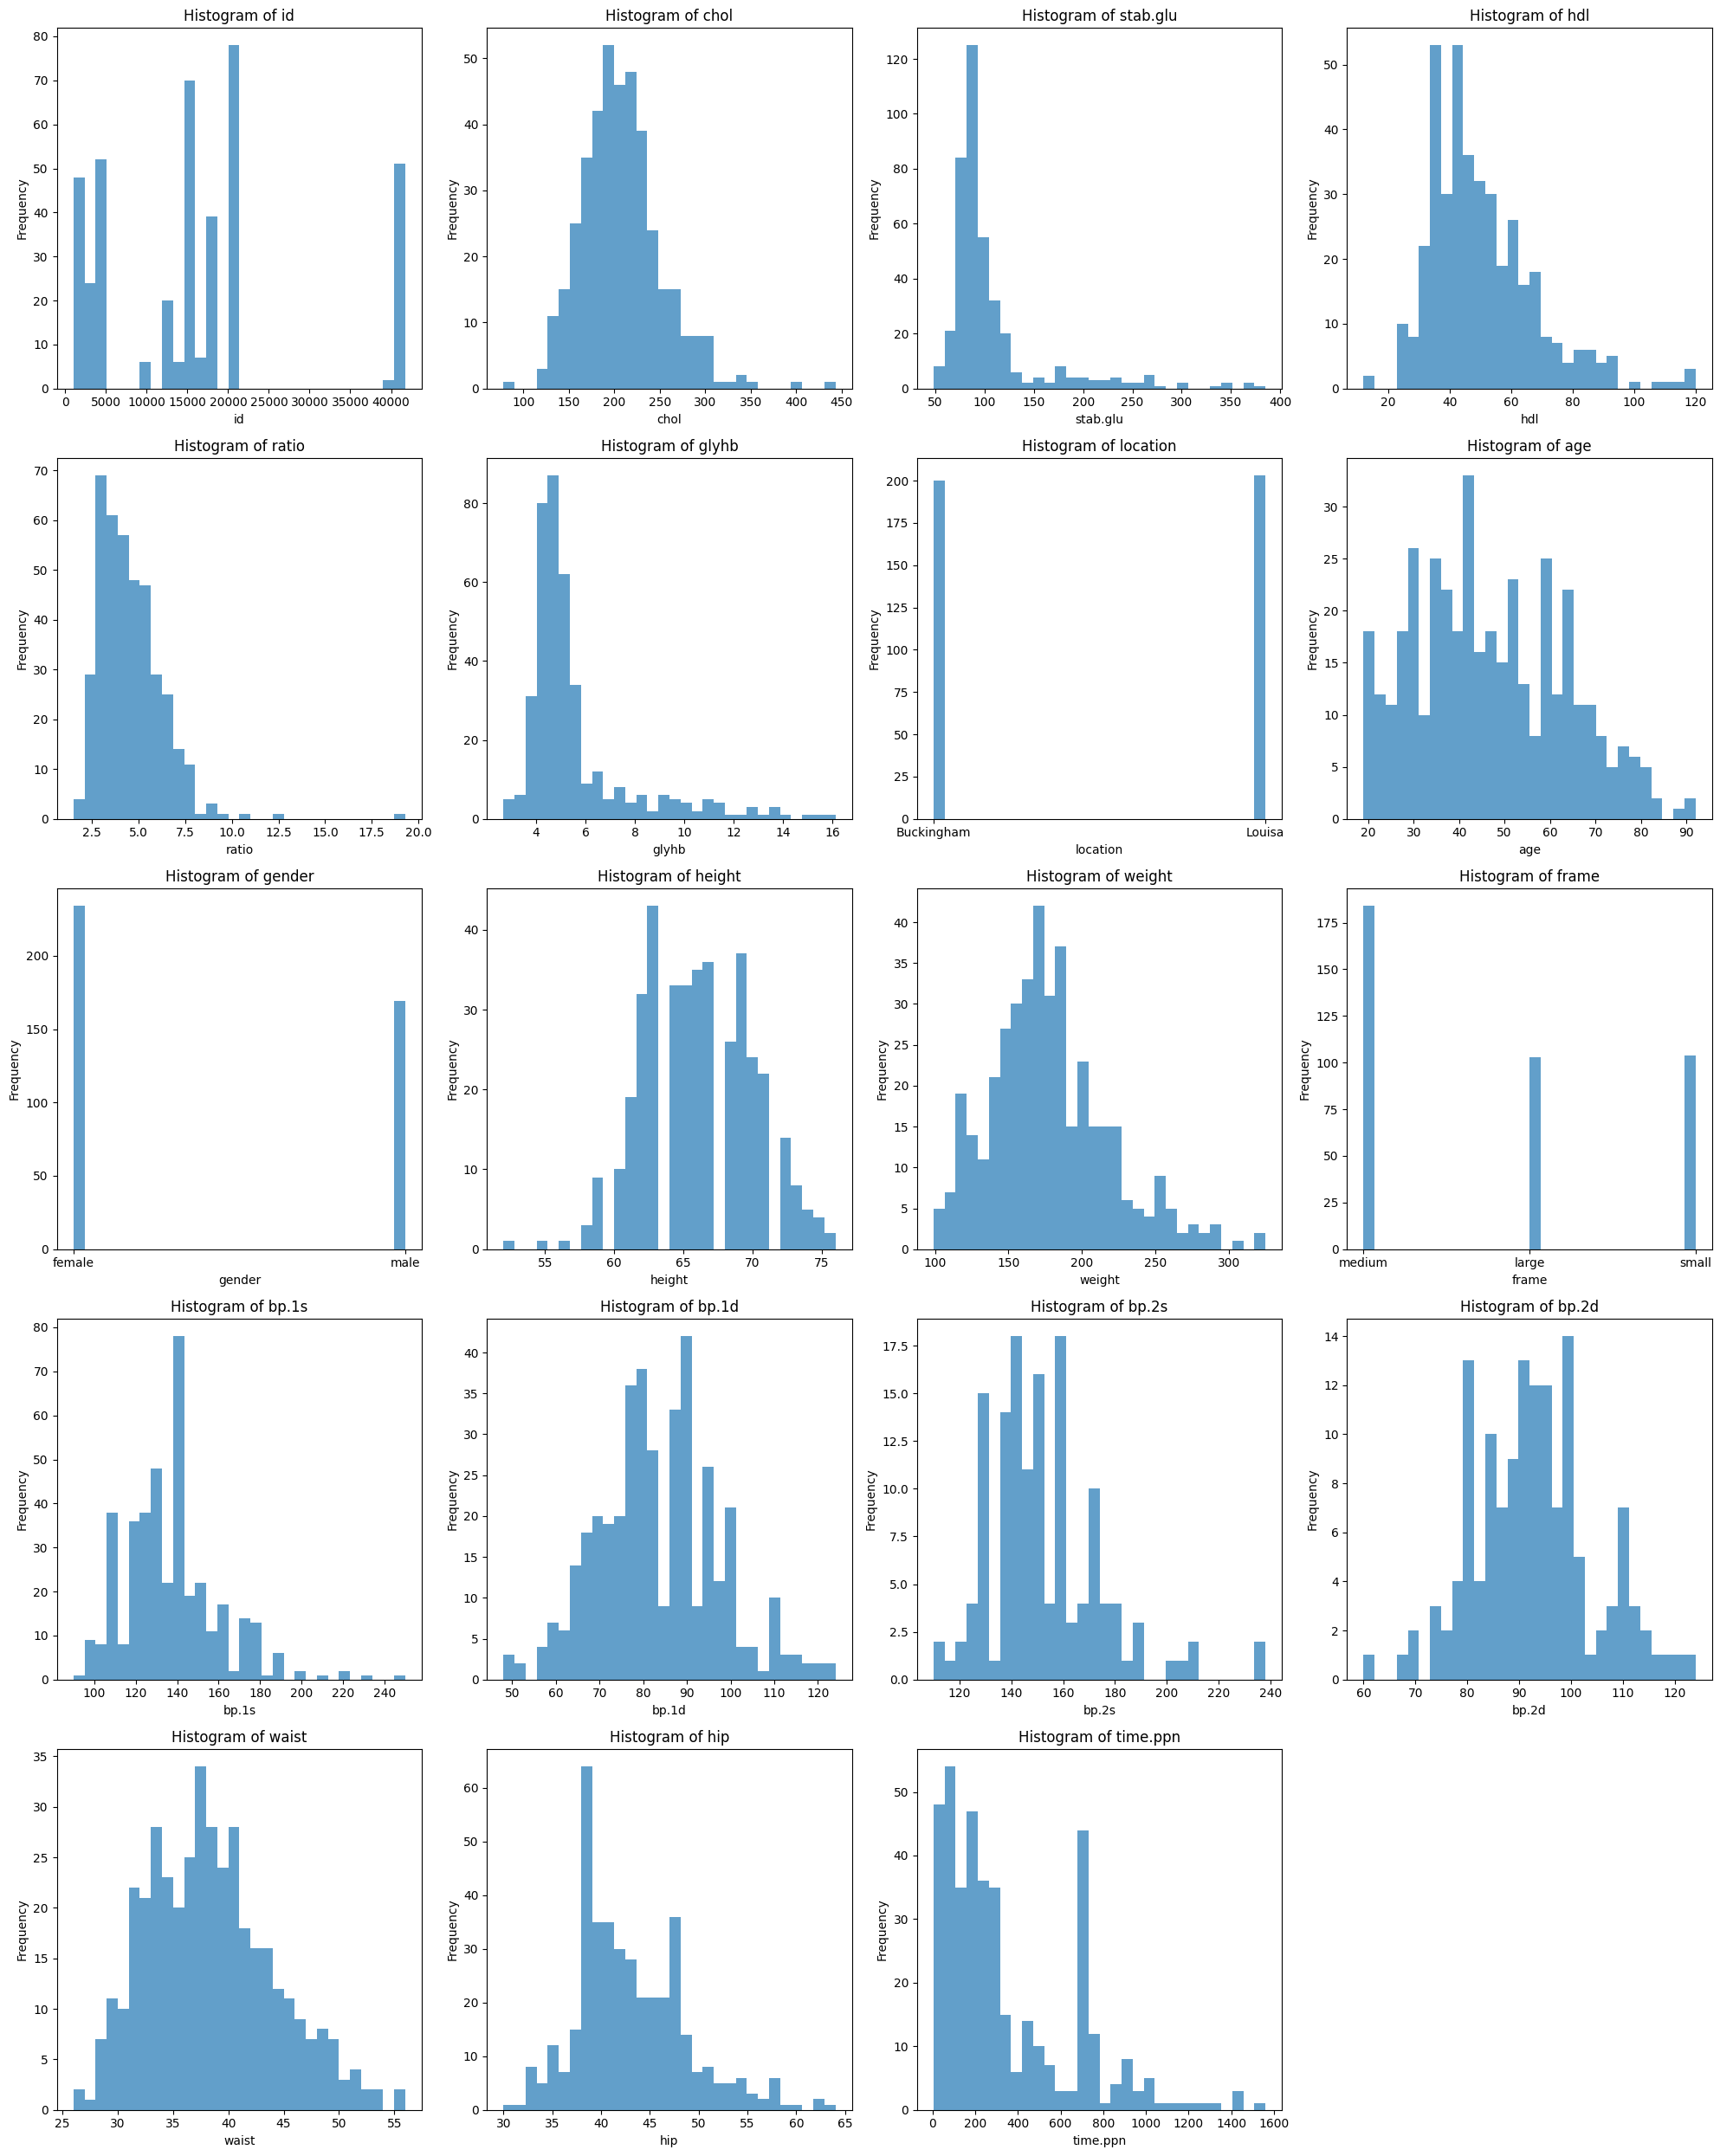

In [5]:
cols = data_diabet.columns
n_cols = 4                       # jumlah kolom subplot
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, item in enumerate(cols):
    axes[i].hist(data_diabet[item].dropna(), bins=30, alpha=0.7)
    axes[i].set_title(f'Histogram of {item}')
    axes[i].set_xlabel(item)
    axes[i].set_ylabel('Frequency')

# hapus subplot kosong (jika ada)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Preprocessing Data

### 1. Menghapus Kolom

In [6]:
data_diabet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [7]:
data_diabet = data_diabet.drop(columns=['id'])
data_diabet

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


### 2. Mengisi Data Kosong

In [8]:
data_diabet.isnull().sum()

chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64

In [9]:
data_mean = ["bp.2s","bp.1s","bp.2d","bp.1d","chol","height","weight"]
for item in data_mean:
    data_diabet[item] = data_diabet[item].fillna(data_diabet[item].mean())

data_median = ["hdl","ratio","glyhb","waist","hip","time.ppn"]
for item in data_median:
    data_diabet[item] = data_diabet[item].fillna(data_diabet[item].median())

data_mode = ["frame"]
for item in data_mode:
    data_diabet[item] = data_diabet[item].fillna(data_diabet[item].mode()[0])

In [10]:
def glyhb_category(x):
    if x < 5.7:
        return "normal"
    elif x < 6.5:
        return "prediabetes"
    else:
        return "diabetes"

data_diabet["glyhb_cat"] = data_diabet["glyhb"].apply(glyhb_category)
data_diabet

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,glyhb_cat
0,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,152.382979,92.524823,29.0,38.0,720.0,normal
1,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,152.382979,92.524823,46.0,48.0,360.0,normal
2,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.000000,92.000000,49.0,57.0,180.0,normal
3,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,152.382979,92.524823,33.0,38.0,480.0,normal
4,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,152.382979,92.524823,44.0,41.0,300.0,diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.000000,94.000000,35.0,39.0,210.0,diabetes
399,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.000000,102.000000,32.0,43.0,180.0,normal
400,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,152.382979,92.524823,33.0,40.0,20.0,diabetes
401,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,152.382979,92.524823,41.0,48.0,255.0,normal


### 3. Normalisasi

In [11]:
from sklearn.preprocessing import RobustScaler

categorical_cols = ["location", "gender", "frame", "glyhb_cat"]

num_cols = data_diabet.drop(columns=categorical_cols)\
                      .select_dtypes(include='number')\
                      .columns

scaler = RobustScaler()
scaled_array = scaler.fit_transform(data_diabet[num_cols])

data_scaled = pd.DataFrame(
    scaled_array,
    columns=num_cols,
    index=data_diabet.index
)

In [12]:
data_scaled = data_scaled.join(data_diabet[categorical_cols])
data_scaled

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,location,gender,frame,glyhb_cat
0,-0.019608,-0.28,0.476190,-0.272727,-0.447257,0.038462,-0.666667,-1.061224,-0.750000,-1.533333,0.000000,0.000000,-1.000,-0.571429,1.207547,Buckingham,female,medium,normal
1,-0.764706,0.32,-1.047619,1.227273,-0.337553,-0.615385,-0.333333,0.918367,-1.000000,-0.933333,0.000000,0.000000,1.125,0.857143,0.301887,Buckingham,female,large,normal
2,0.470588,0.12,-0.428571,0.909091,-0.168777,0.500000,-0.833333,1.693878,2.250000,0.666667,32.617021,-0.524823,1.500,2.142857,-0.150943,Buckingham,female,large,normal
3,-2.470588,0.16,-1.619048,1.045455,-0.177215,0.846154,0.166667,-1.102041,-1.083333,-2.133333,0.000000,0.000000,-0.500,-0.571429,0.603774,Buckingham,male,large,normal
4,0.882353,0.04,-0.857143,2.136364,2.430379,0.730769,0.333333,0.204082,0.083333,-0.133333,0.000000,0.000000,0.875,-0.142857,0.150943,Buckingham,male,medium,diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1.803922,11.20,0.000000,1.000000,9.510547,0.307692,0.500000,0.000000,0.083333,0.800000,-22.382979,1.475177,-0.250,-0.428571,-0.075472,Louisa,male,medium,diabetes
399,1.568627,0.00,0.380952,0.500000,-0.379747,0.230769,-0.500000,-0.387755,0.166667,1.200000,-6.382979,9.475177,-0.625,0.142857,-0.150943,Louisa,female,medium,normal
400,-0.196078,7.20,-0.380952,0.409091,7.417720,-0.615385,0.500000,-0.122449,-0.666667,-0.800000,0.000000,0.000000,-0.500,-0.285714,-0.553459,Louisa,female,small,diabetes
401,-0.098039,-0.52,0.285714,-0.181818,-0.295359,-0.153846,-0.500000,0.489796,-0.666667,-0.266667,0.000000,0.000000,0.500,0.857143,0.037736,Louisa,female,medium,normal


### 4. Mengklasifikan Gender

In [13]:
data_diabet_male = data_scaled.drop(data_scaled[data_scaled['gender'] != 'male'].index)
data_diabet_male

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,location,gender,frame,glyhb_cat
3,-2.470588,0.16,-1.619048,1.045455,-0.177215,0.846154,0.166667,-1.102041,-1.083333,-2.133333,0.000000,0.000000,-0.500,-0.571429,0.603774,Buckingham,male,large,normal
4,0.882353,0.04,-0.857143,2.136364,2.430379,0.730769,0.333333,0.204082,0.083333,-0.133333,0.000000,0.000000,0.875,-0.142857,0.150943,Buckingham,male,medium,diabetes
5,0.862745,0.20,1.095238,-0.272727,-0.025317,-0.423077,0.833333,0.346939,-0.166667,0.266667,0.000000,0.000000,-0.125,0.000000,-0.113208,Buckingham,male,large,normal
6,-0.176471,0.12,-0.238095,0.272727,0.000000,-0.576923,0.500000,0.367347,1.041667,2.000000,8.617021,19.475177,1.125,1.000000,1.207547,Buckingham,male,medium,normal
7,0.450980,-0.56,-0.095238,0.454545,-0.759494,-0.307692,-1.166667,-0.061224,0.037688,0.088107,0.000000,0.000000,-0.375,-0.428571,1.962264,Buckingham,male,medium,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1.294118,-0.64,-0.285714,1.181818,-1.063291,-0.115385,0.000000,0.244898,0.416667,0.800000,-3.382979,1.475177,0.250,-0.142857,-0.528302,Louisa,male,large,normal
392,0.117647,-0.32,1.666667,-0.727273,0.101266,1.269231,0.000000,-0.571429,-1.083333,-0.800000,0.000000,0.000000,0.125,-0.428571,0.754717,Louisa,male,large,normal
393,-0.235294,-0.16,1.095238,-0.636364,-0.388186,0.230769,-0.166667,-0.551020,-0.250000,1.866667,17.617021,25.475177,0.000,0.000000,-0.452830,Louisa,male,large,normal
395,-0.490196,-0.16,0.190476,-0.272727,0.126582,-0.307692,0.000000,-0.755102,2.250000,0.800000,19.617021,7.475177,-0.500,-0.428571,0.603774,Louisa,male,medium,normal


In [14]:
data_diabet_male.count()

chol         169
stab.glu     169
hdl          169
ratio        169
glyhb        169
age          169
height       169
weight       169
bp.1s        169
bp.1d        169
bp.2s        169
bp.2d        169
waist        169
hip          169
time.ppn     169
location     169
gender       169
frame        169
glyhb_cat    169
dtype: int64

In [15]:
data_diabet_female = data_scaled.drop(data_scaled[data_scaled['gender'] != 'female'].index)
data_diabet_female

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,location,gender,frame,glyhb_cat
0,-0.019608,-0.28,0.476190,-0.272727,-0.447257,0.038462,-0.666667,-1.061224,-0.750000,-1.533333,0.000000,0.000000,-1.000,-0.571429,1.207547,Buckingham,female,medium,normal
1,-0.764706,0.32,-1.047619,1.227273,-0.337553,-0.615385,-0.333333,0.918367,-1.000000,-0.933333,0.000000,0.000000,1.125,0.857143,0.301887,Buckingham,female,large,normal
2,0.470588,0.12,-0.428571,0.909091,-0.168777,0.500000,-0.833333,1.693878,2.250000,0.666667,32.617021,-0.524823,1.500,2.142857,-0.150943,Buckingham,female,large,normal
9,1.156863,0.00,-0.285714,1.090909,0.793249,0.384615,-0.500000,0.591837,-1.166667,-0.666667,0.000000,0.000000,1.000,1.142857,0.000000,Buckingham,female,small,prediabetes
10,0.745098,-0.28,0.380952,0.136364,-0.059072,0.576923,-0.166667,-0.346939,-0.250000,0.533333,-22.382979,-2.524823,0.250,0.428571,0.150943,Louisa,female,medium,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.901961,0.04,3.428571,-0.727273,-0.472574,1.692308,-0.833333,-1.183673,3.416667,0.533333,85.617021,-2.524823,-0.750,-0.142857,-0.075472,Louisa,female,medium,normal
399,1.568627,0.00,0.380952,0.500000,-0.379747,0.230769,-0.500000,-0.387755,0.166667,1.200000,-6.382979,9.475177,-0.625,0.142857,-0.150943,Louisa,female,medium,normal
400,-0.196078,7.20,-0.380952,0.409091,7.417720,-0.615385,0.500000,-0.122449,-0.666667,-0.800000,0.000000,0.000000,-0.500,-0.285714,-0.553459,Louisa,female,small,diabetes
401,-0.098039,-0.52,0.285714,-0.181818,-0.295359,-0.153846,-0.500000,0.489796,-0.666667,-0.266667,0.000000,0.000000,0.500,0.857143,0.037736,Louisa,female,medium,normal


In [16]:
data_diabet_female.count()

chol         234
stab.glu     234
hdl          234
ratio        234
glyhb        234
age          234
height       234
weight       234
bp.1s        234
bp.1d        234
bp.2s        234
bp.2d        234
waist        234
hip          234
time.ppn     234
location     234
gender       234
frame        234
glyhb_cat    234
dtype: int64

## Modelling

### 1. Random Forest 

#### 1. Male

In [17]:
from sklearn.model_selection import train_test_split

X = data_diabet_male.drop(columns=['glyhb_cat','glyhb','location','gender','frame'])
y = data_diabet_male['glyhb_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Akurasi: 0.7941176470588235

Classification Report:
              precision    recall  f1-score   support

    diabetes       0.67      0.50      0.57         4
      normal       0.81      0.96      0.88        26
 prediabetes       0.00      0.00      0.00         4

    accuracy                           0.79        34
   macro avg       0.49      0.49      0.48        34
weighted avg       0.70      0.79      0.74        34



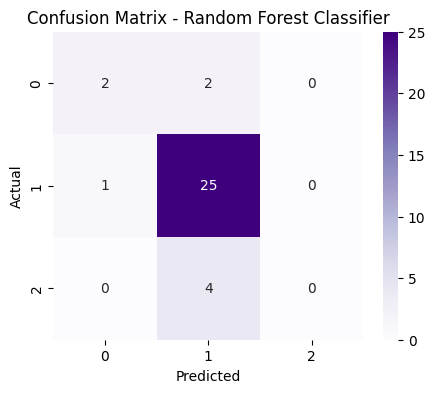

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

model_male_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_male_rf.fit(X_train, y_train)
y_pred_rf_male = model_male_rf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred_rf_male))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_male, zero_division=0))
cm = confusion_matrix(y_test, y_pred_rf_male)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

#### 2. Female

In [19]:
from sklearn.model_selection import train_test_split

X = data_diabet_female.drop(columns=['glyhb_cat','glyhb','location','gender','frame'])
y = data_diabet_female['glyhb_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Akurasi: 0.8723404255319149

Classification Report:
              precision    recall  f1-score   support

    diabetes       1.00      0.62      0.77         8
      normal       0.86      1.00      0.92        36
 prediabetes       0.00      0.00      0.00         3

    accuracy                           0.87        47
   macro avg       0.62      0.54      0.56        47
weighted avg       0.83      0.87      0.84        47



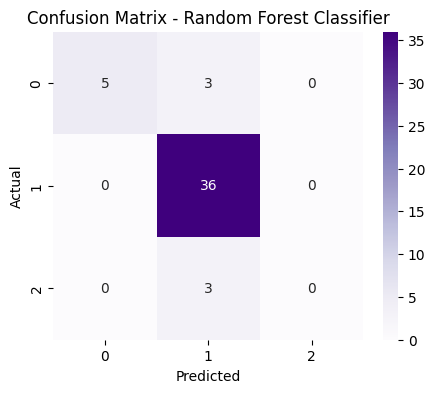

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

model_female_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_female_rf.fit(X_train, y_train)
y_pred_rf_female = model_female_rf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred_rf_female))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_female, zero_division=0))
cm = confusion_matrix(y_test, y_pred_rf_female)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

### 2. XGBoost

#### 1. Male

In [21]:
from sklearn.model_selection import train_test_split

X = data_diabet_male.drop(columns=['glyhb_cat','glyhb','location','gender','frame'])
y = data_diabet_male['glyhb_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Akurasi: 0.7941176470588235

Classification Report:
              precision    recall  f1-score   support

    diabetes       0.67      0.50      0.57         4
      normal       0.81      0.96      0.88        26
 prediabetes       0.00      0.00      0.00         4

    accuracy                           0.79        34
   macro avg       0.49      0.49      0.48        34
weighted avg       0.70      0.79      0.74        34



c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

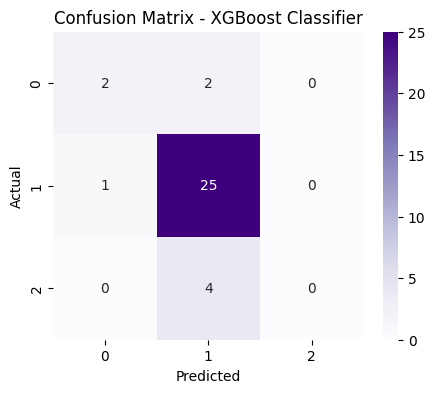

In [22]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

xgb_diabet_male = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",     
    num_class=3,                    
    eval_metric="mlogloss",
    random_state=42
)

xgb_diabet_male.fit(X_train, y_train_enc)

y_pred_enc = xgb_diabet_male.predict(X_test)

print("Akurasi:", accuracy_score(y_test_enc, y_pred_enc))

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_enc, target_names=le.classes_))
cm = confusion_matrix(y_test_enc, y_pred_enc)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

#### 2. Female

In [23]:
from sklearn.model_selection import train_test_split

X = data_diabet_female.drop(columns=['glyhb_cat','glyhb','location','gender','frame'])
y = data_diabet_female['glyhb_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Akurasi: 0.8723404255319149

Classification Report:
              precision    recall  f1-score   support

    diabetes       0.75      0.75      0.75         8
      normal       0.90      0.97      0.93        36
 prediabetes       0.00      0.00      0.00         3

    accuracy                           0.87        47
   macro avg       0.55      0.57      0.56        47
weighted avg       0.82      0.87      0.84        47



c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

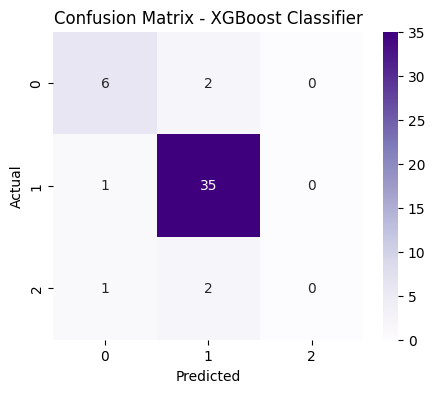

In [24]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

xgb_diabet_female = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",     
    num_class=3,                    
    eval_metric="mlogloss",
    random_state=42
)

xgb_diabet_female.fit(X_train, y_train_enc)

y_pred_enc = xgb_diabet_female.predict(X_test)

print("Akurasi:", accuracy_score(y_test_enc, y_pred_enc))

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_enc, target_names=le.classes_))
cm = confusion_matrix(y_test_enc, y_pred_enc)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

### 3. SVM

#### 1. Male

In [25]:
from sklearn.model_selection import train_test_split

X = data_diabet_male.drop(columns=['glyhb_cat','glyhb','location','gender','frame'])
y = data_diabet_male['glyhb_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.7941176470588235

Classification Report:
              precision    recall  f1-score   support

    diabetes       1.00      0.25      0.40         4
      normal       0.79      1.00      0.88        26
 prediabetes       0.00      0.00      0.00         4

    accuracy                           0.79        34
   macro avg       0.60      0.42      0.43        34
weighted avg       0.72      0.79      0.72        34



c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

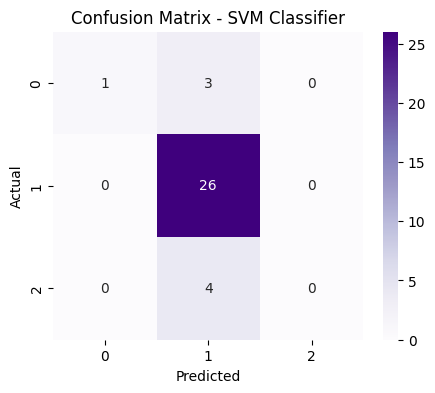

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

svm_model_male = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    decision_function_shape="ovr",
    random_state=42,
    probability=True
)

svm_model_male.fit(X_train, y_train_enc)
y_pred = svm_model_male.predict(X_test)

print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

#### 2. Female

In [27]:
from sklearn.model_selection import train_test_split

X = data_diabet_female.drop(columns=['glyhb_cat','glyhb','location','gender','frame'])
y = data_diabet_female['glyhb_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.8297872340425532

Classification Report:
              precision    recall  f1-score   support

    diabetes       1.00      0.38      0.55         8
      normal       0.82      1.00      0.90        36
 prediabetes       0.00      0.00      0.00         3

    accuracy                           0.83        47
   macro avg       0.61      0.46      0.48        47
weighted avg       0.80      0.83      0.78        47



c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

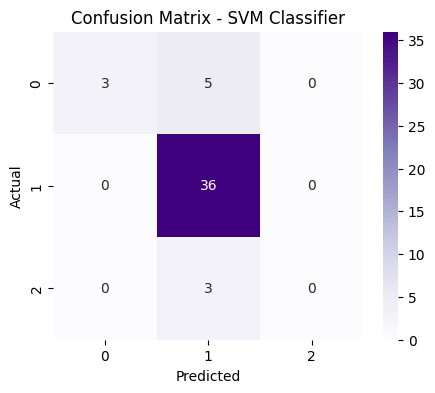

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

svm_model_female = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    decision_function_shape="ovr",
    random_state=42,
    probability=True
)

svm_model_female.fit(X_train, y_train_enc)
y_pred = svm_model_female.predict(X_test)

print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

## ROC-AUC

### 1. Male

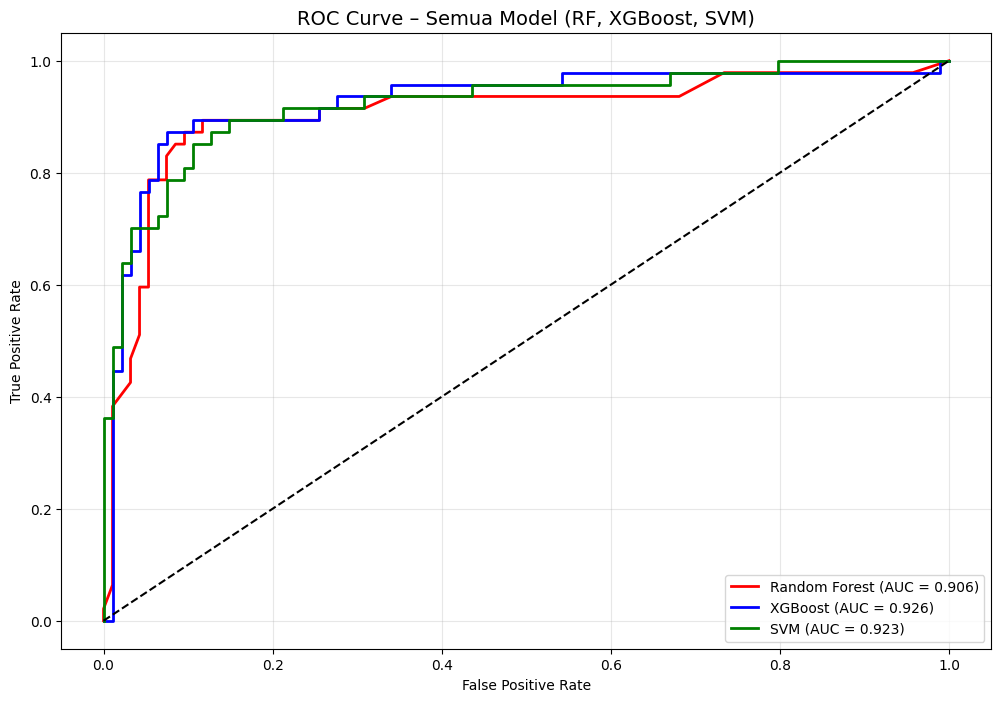

In [29]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize label untuk multiclass (DT, RF, ET, CatBoost, Stacking)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Probabilitas dari masing-masing model
y_score_rf    = model_male_rf.predict_proba(X_test)
y_score_xgb    = xgb_diabet_male.predict_proba(X_test)
y_score_svm = svm_model_male.predict_proba(X_test)

# XGBoost membutuhkan label encoded
le = LabelEncoder()
y_test_enc = le.fit(classes).transform(y_test)
y_test_bin_xgb = label_binarize(y_test_enc, classes=[0, 1, 2])

plt.figure(figsize=(12, 8))

def plot_roc_curve(y_true_bin, y_score, model_name, color):
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=color, label=f"{model_name} (AUC = {roc_auc:.3f})")

plot_roc_curve(y_test_bin,      y_score_rf,    "Random Forest", "red")
plot_roc_curve(y_test_bin,      y_score_xgb,    "XGBoost", "blue")
plot_roc_curve(y_test_bin,      y_score_svm,    "SVM",   "green")

# Garis baseline
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve – Semua Model (RF, XGBoost, SVM)", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### 2. Female

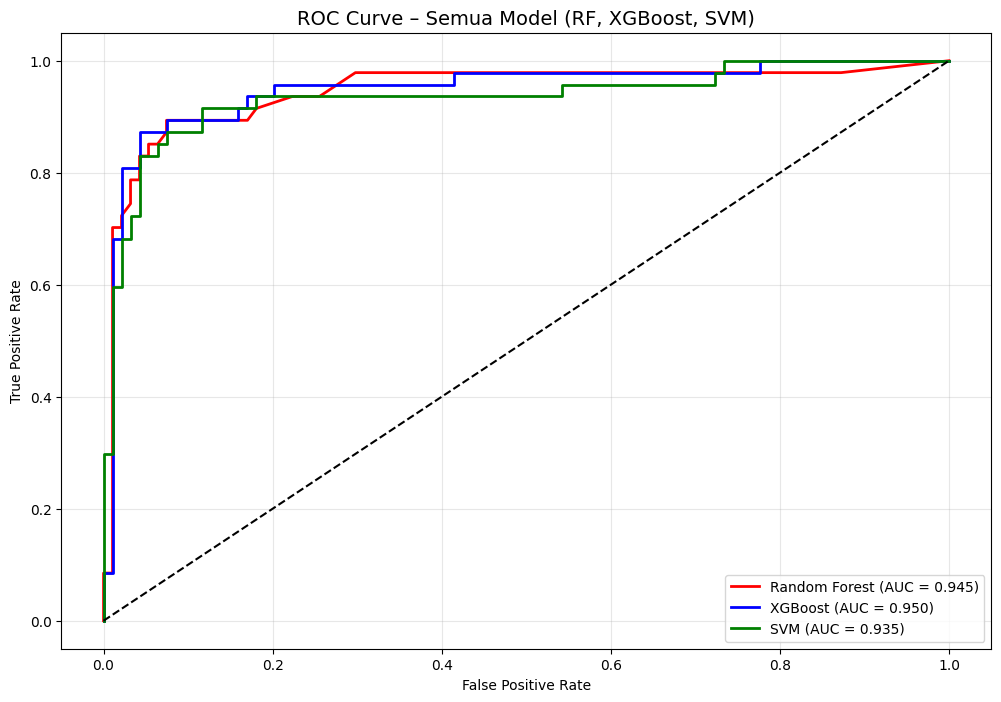

In [30]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize label untuk multiclass (DT, RF, ET, CatBoost, Stacking)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Probabilitas dari masing-masing model
y_score_rf    = model_female_rf.predict_proba(X_test)
y_score_xgb    = xgb_diabet_female.predict_proba(X_test)
y_score_svm = svm_model_female.predict_proba(X_test)

# XGBoost membutuhkan label encoded
le = LabelEncoder()
y_test_enc = le.fit(classes).transform(y_test)
y_test_bin_xgb = label_binarize(y_test_enc, classes=[0, 1, 2])

plt.figure(figsize=(12, 8))

def plot_roc_curve(y_true_bin, y_score, model_name, color):
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=color, label=f"{model_name} (AUC = {roc_auc:.3f})")

plot_roc_curve(y_test_bin,      y_score_rf,    "Random Forest", "red")
plot_roc_curve(y_test_bin,      y_score_xgb,    "XGBoost", "blue")
plot_roc_curve(y_test_bin,      y_score_svm,    "SVM",   "green")

# Garis baseline
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve – Semua Model (RF, XGBoost, SVM)", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


## Learning Curve

### 1. Male

In [31]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train, y_train,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Score')

    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='orange', alpha=0.2)

    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Jumlah Data Latih')
    plt.ylabel('Akurasi')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


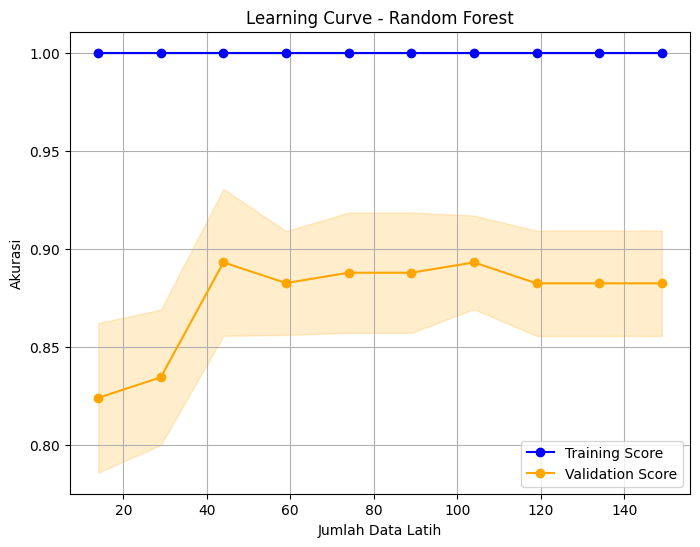

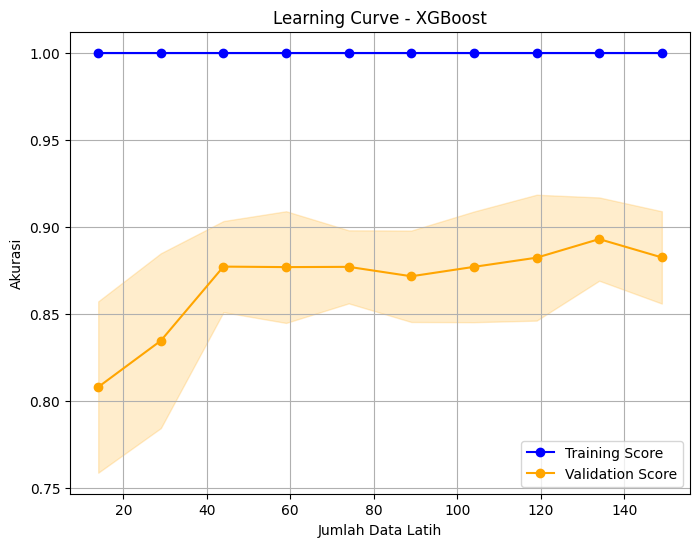

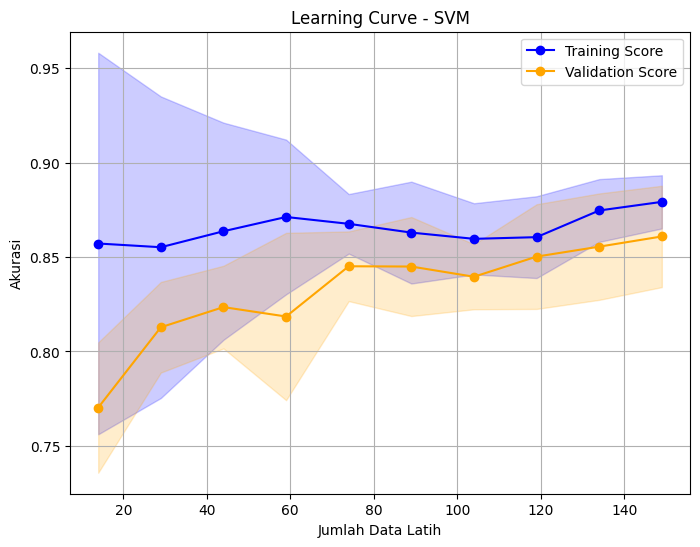

In [32]:
models = {
    "Random Forest": model_male_rf,
    "XGBoost": xgb_diabet_male,
    "SVM": svm_model_male
}

for name, model in models.items():
    plot_learning_curve(model, X_train, y_train_enc, title=name)

### 2. Female

In [33]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train, y_train,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Score')

    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='orange', alpha=0.2)

    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Jumlah Data Latih')
    plt.ylabel('Akurasi')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


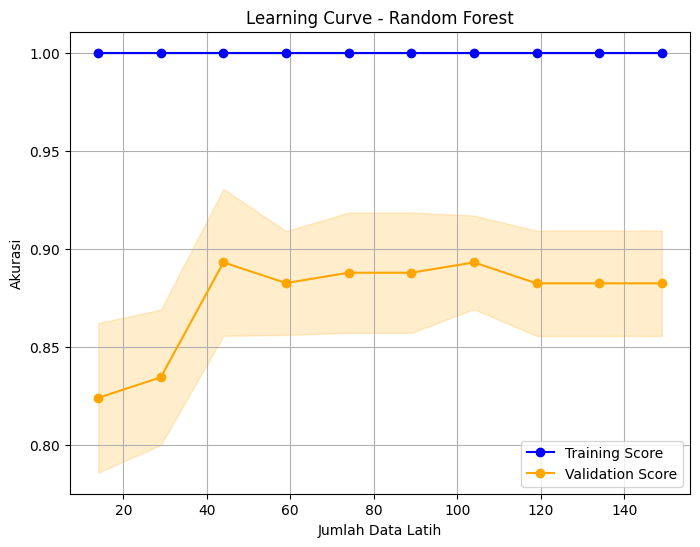

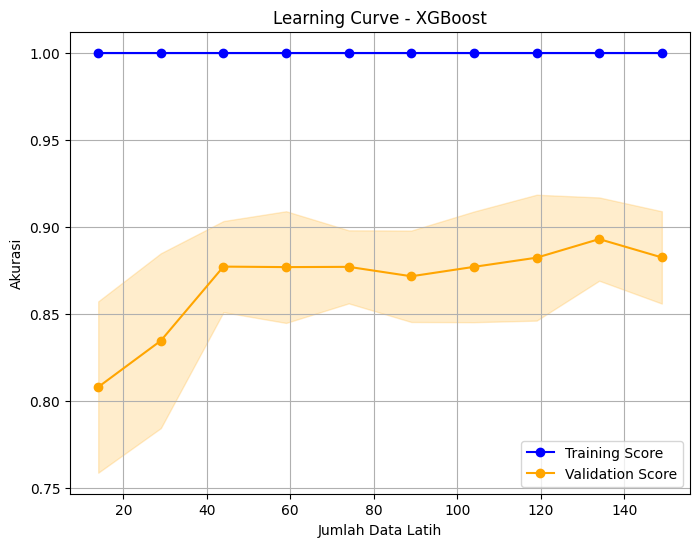

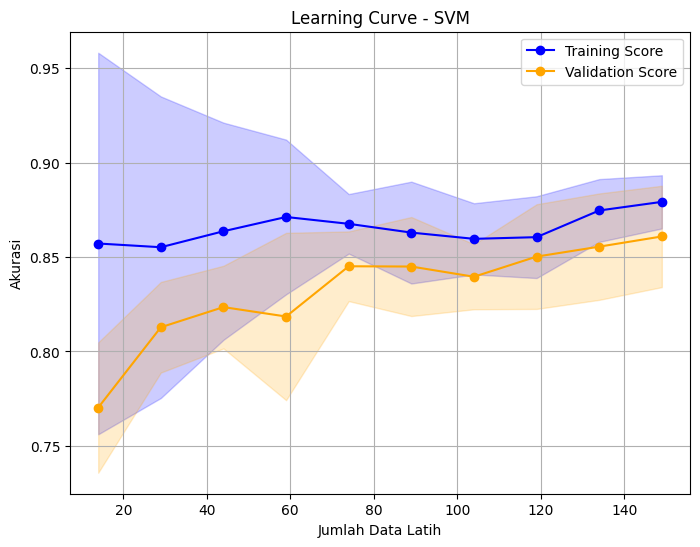

In [34]:
models = {
    "Random Forest": model_female_rf,
    "XGBoost": xgb_diabet_female,
    "SVM": svm_model_female
}

for name, model in models.items():
    plot_learning_curve(model, X_train, y_train_enc, title=name)

## Visualisasi

### 1. Male

In [35]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

def pca_decision_boundary(X, y, title_suffix):
    # Encode target
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    classes = np.unique(y_enc)
    n_classes = len(classes)

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Models
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
        "XGBoost": XGBClassifier(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=3,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="multi:softprob",
            num_class=n_classes,
            eval_metric="mlogloss",
            random_state=42
        ),
        "SVM": SVC(
            kernel="rbf",
            C=1.0,
            gamma="scale",
            decision_function_shape="ovr",
            probability=True,
            random_state=42
        )
    }

    # Train
    for clf in models.values():
        clf.fit(X_pca, y_enc)

    # Grid
    x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
    y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Colormap
    cmap_bg = ListedColormap(["#CDE7F0", "#F7D6E0", "#D9F2D9"])
    point_colors = ["tab:blue", "tab:orange", "tab:green"]
    markers = ["o", "s", "^"]

    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for ax, (name, clf) in zip(axes, models.items()):
        Z = clf.predict(grid).reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cmap_bg, alpha=0.7)

        for i, cls in enumerate(classes):
            mask = y_enc == cls
            ax.scatter(
                X_pca[mask, 0],
                X_pca[mask, 1],
                c=point_colors[i],
                marker=markers[i],
                s=60,
                edgecolor="k",
                linewidths=0.7,
                alpha=0.9,
                label=le.inverse_transform([cls])[0]
            )

        ax.set_title(f"{name} ({title_suffix})", fontsize=13, fontweight="bold")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.grid(alpha=0.3)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right")
    plt.tight_layout()
    plt.show()

In [36]:
y_col = "glyhb_cat"

X_cols = data_diabet.select_dtypes(include="number").columns.tolist()

# kalau target ternyata numerik, baru dibuang
if y_col in X_cols:
    X_cols.remove(y_col)
    
# Male
data_male = data_diabet[data_diabet["gender"] == "male"]
X_male = data_male[X_cols]
y_male = data_male[y_col]

# Female
data_female = data_diabet[data_diabet["gender"] == "female"]
X_female = data_female[X_cols]
y_female = data_female[y_col]

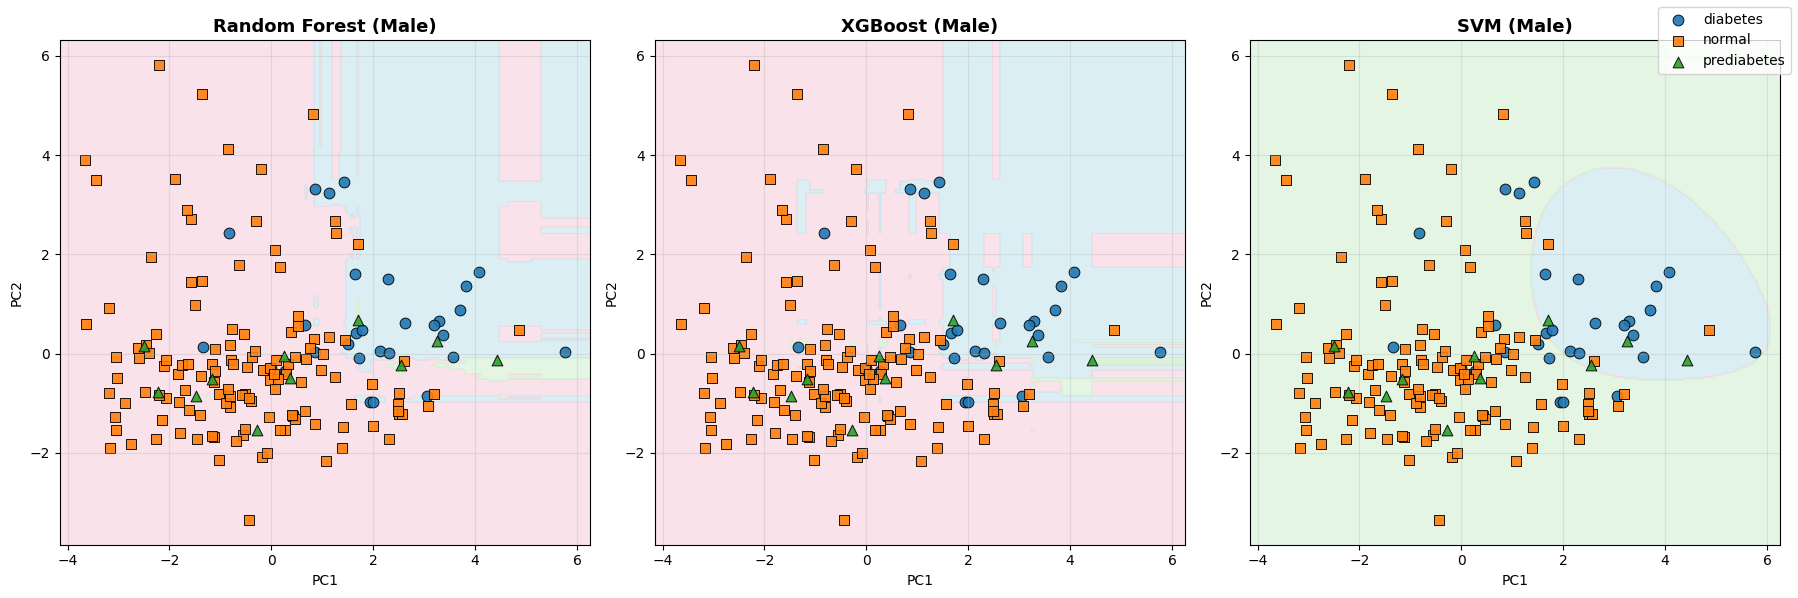

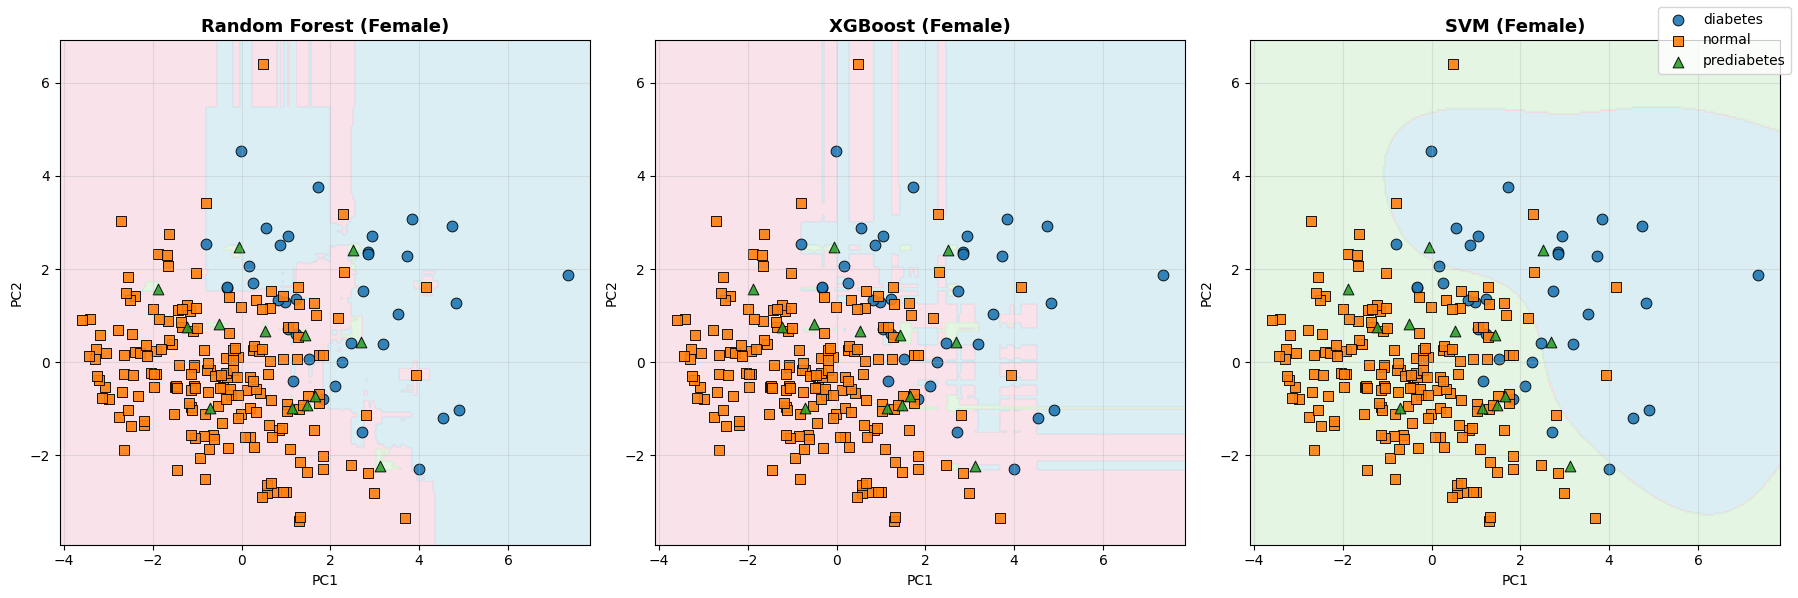

In [37]:
pca_decision_boundary(X_male, y_male, "Male")
pca_decision_boundary(X_female, y_female, "Female")